## Shortening Evaluation

In [45]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')
from config import *
from score import  RougeScore, BertScore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [46]:
params = model_params
def get_rouge(params, method, quantity, data, epoch):
    path = f"""../model/t5-small_{data}_{method}_{quantity}_{epoch}epochs/"""
    rougescore = RougeScore(model = params["MODEL"], dataset = data, EPOCH = epoch, path = path)
    rougescores = rougescore.getscore_ave()
    return rougescores

def get_bert(params, method, quantity, data, epoch):
    path = f"""../model/t5-small_{data}_{method}_{quantity}_{epoch}epochs/"""
    bertscore = BertScore(model = params["MODEL"], dataset = data, EPOCH = epoch, path = path)
    bertscores = bertscore.getscore()
    return bertscores

#### Fine-tuned for 50 epochs

In [49]:
rougescores_head_1024_512 = get_rouge(params, "head-only", "-_1024", 'xsum', 50)
rougescores_stopwords_all_1024 = get_rouge(params, "stopwords_all", "-_1024", 'xsum', 50)
rougescores_stopwords_neg_1024 = get_rouge(params, "stopwords_neg", "-_1024", 'xsum', 50)
rougescores_stopwords_all_luhn_1024 = get_rouge(params, "combo_stopwords_all_luhn", "512_1024", 'xsum', 50)
# rougescores_stopwords_all_textrank_1024 = get_rouge(params, "combo_stopwords_all_textrank", "512_1024", 'xsum', 50)
rougescores_textrank_1024 = get_rouge(params, "textrank", "512_1024", 'xsum', 50)
rougescores_luhn_1024 = get_rouge(params, "luhn", "512_1024", 'xsum', 50)

#### Compare All Strategies Rouge Scores

In [52]:
rouge_1024 = {"plots": [rougescores_head_1024_512, rougescores_stopwords_all_1024,
                        rougescores_stopwords_neg_1024, rougescores_stopwords_all_luhn_1024, rougescores_luhn_1024, rougescores_textrank_1024],
#                         rougescores_stopwords_all_textrank_1024,
#                         rougescores_textrank_1024, rougescores_luhn_1024],
              "labels": ['head-only', 'stopwords_all', 
                         'stopwords_neg', 'stopwords_all_luhn', 'luhn', 'textrank']}
#                          'stopwords_all_textrank',
#                          'textrank', 'luhn' ]}

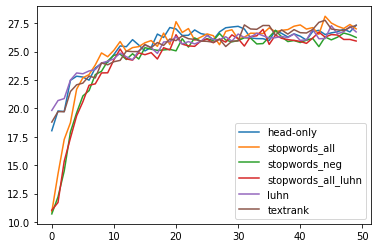

In [53]:
for i in range(len(rouge_1024['plots'])):
    plt.plot(rouge_1024['plots'][i]['rouge1'], label=rouge_1024['labels'][i])
    plt.legend()

/tmp/ipykernel_67619/3313722505.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(quantity_25_lables, rotation=25)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_67619/3313722505.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(quantity_25_lables, rotation=25)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_67619/3313722505.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(quantity_25_lables, rotation=25)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 3, '20.1'),
 Text(0, 3, '19.2'),
 Text(0, 3, '19.3'),
 Text(0, 3, '18.8'),
 Text(0, 3, '20.5'),
 Text(0, 3, '20.6')]

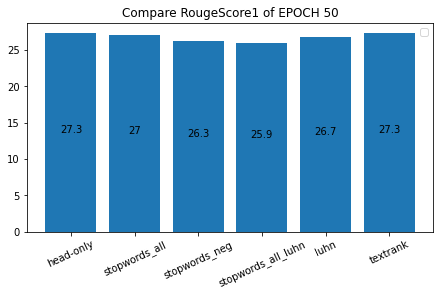

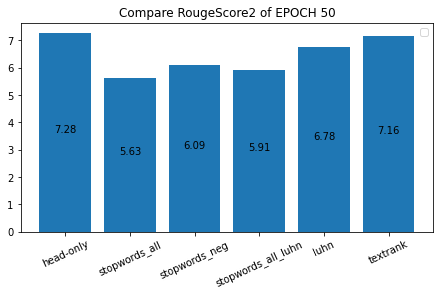

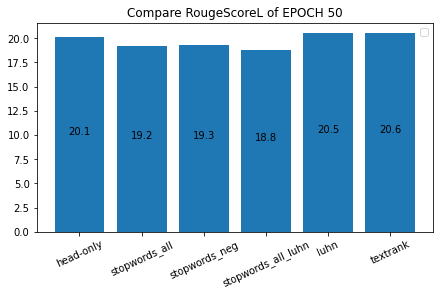

In [54]:
def prep_barplot(quantity, score = 'rouge1', mode = "lastepoch"):
    if mode == "lastepoch":
        scores = [ q[score][-1] for q in quantity['plots']]
    else:
        scores = [ max(q[score]) for q in quantity['plots']]
    lables = [ l for l in quantity['labels']]
    return scores, lables

fig, axs = plt.subplots(1, 1, figsize=(6, 4), constrained_layout = True)
quantity_25_scores, quantity_25_lables = prep_barplot(rouge_1024, 'rouge1')
ax00 = axs.bar(quantity_25_lables, quantity_25_scores)
axs.set_xticklabels(quantity_25_lables, rotation=25)
axs.set_title("Compare RougeScore1 of EPOCH 50")
axs.legend()
axs.bar_label(ax00, padding=3, label_type= 'center', fmt ='%.3g')

fig, axs = plt.subplots(1, 1, figsize=(6, 4), constrained_layout = True)
quantity_25_scores, quantity_25_lables = prep_barplot(rouge_1024, 'rouge2')
ax00 = axs.bar(quantity_25_lables, quantity_25_scores)
axs.set_xticklabels(quantity_25_lables, rotation=25)
axs.set_title("Compare RougeScore2 of EPOCH 50")
axs.legend()
axs.bar_label(ax00, padding=3, label_type= 'center', fmt ='%.3g')

fig, axs = plt.subplots(1, 1, figsize=(6, 4), constrained_layout = True)
quantity_25_scores, quantity_25_lables = prep_barplot(rouge_1024, 'rougeL')
ax00 = axs.bar(quantity_25_lables, quantity_25_scores)
axs.set_xticklabels(quantity_25_lables, rotation=25)
axs.set_title("Compare RougeScoreL of EPOCH 50")
axs.legend()
axs.bar_label(ax00, padding=3, label_type= 'center', fmt ='%.3g')

/tmp/ipykernel_67619/3684033837.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(quantity_25_lables, rotation=25)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 3, '27.3'),
 Text(0, 3, '28.1'),
 Text(0, 3, '26.9'),
 Text(0, 3, '27'),
 Text(0, 3, '27.3'),
 Text(0, 3, '27.8')]

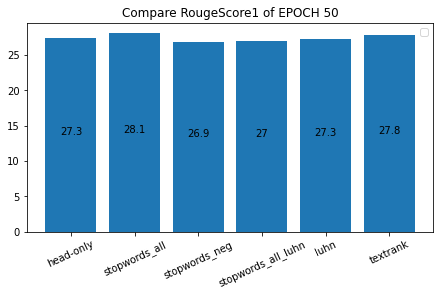

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4), constrained_layout = True)
quantity_25_scores, quantity_25_lables = prep_barplot(rouge_1024, 'rouge1', mode = 'best')
ax00 = axs.bar(quantity_25_lables, quantity_25_scores)
axs.set_xticklabels(quantity_25_lables, rotation=25)
axs.set_title("Compare RougeScore1 of EPOCH 50")
axs.legend()
axs.bar_label(ax00, padding=3, label_type= 'center', fmt ='%.3g')

In [56]:
import numpy as np
a = 5
np.save("best_epoch.npy", a)

In [57]:
c = np.load("best_epoch.npy")

In [58]:
c

array(5)

In [8]:
import numpy as np
a = [5,4]
np.mean(a)

4.5